<a href="https://colab.research.google.com/github/AkashSalmuthe/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
import xgboost as xgb

## **Drive Mounting and Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

path = '/content/drive/MyDrive/Capstone Projects/Supervised Learning - Regression/Bike Sharing Demand Prediction - Akash Salmuthe/'

'''
here we can laod dataset and read it using df = pd.read_csv(path + 'SeoulBikeData.csv') because of 'utf-8' codec can't decode
to read the file we change it's encoding to the : " encoding='latin' "

''' 
# df = pd.read_csv(path + 'SeoulBikeData.csv')


df = pd.read_csv(path + 'SeoulBikeData.csv',encoding='latin')

## **Getting Initial impression of data**



In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### **Changing Column names**

Here we can see that there are columns with its unit but for our convenience we change the names

In [ ]:
df.rename({"Temperature(°C)": "Temperature",
           "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"}, axis = "columns", inplace = True)

In [ ]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


####  **Looking For duplicates entries**

In [ ]:
# df.duplicated()

df.duplicated().sum()

print(df.duplicated().sum(),"Duplicate entries in dataset")

0 Duplicate entries in dataset


### **Looking for missing values**

In [ ]:
# df.isnull()

df.isnull().sum()

#print()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

No null/missing values in dataset.
It lokks good we can proceed further

## **Exploring dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


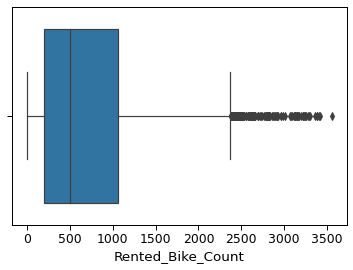

In [ ]:
sns.boxplot(df['Rented_Bike_Count'])

In [ ]:
df['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [ ]:
type(df['Date'])

pandas.core.series.Series

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


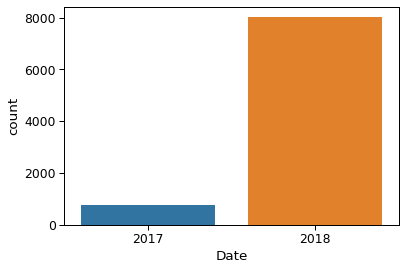

In [ ]:
sns.countplot(df['Date'].dt.year)

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
# df['Day'].unique()

<Figure size 1440x1080 with 0 Axes>

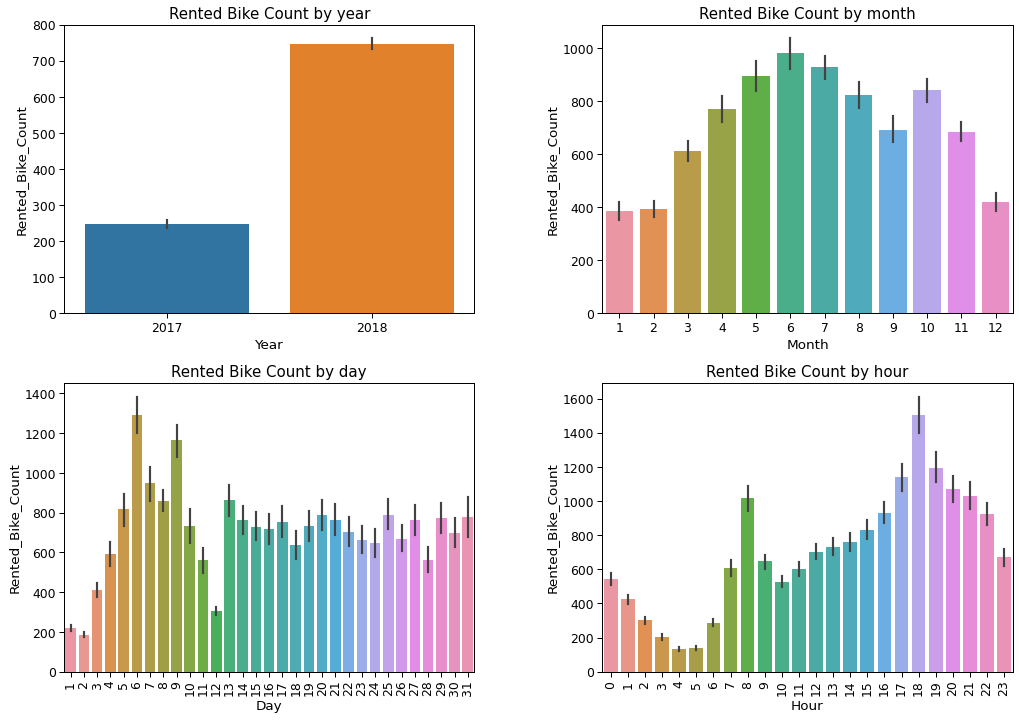

In [ ]:
# Setting Dims. for graph

plt.figure(figsize=(20,15))
plt.rc('font',size=14)
plt.rc('axes',titlesize=15)

# making fig into 2 X 2 grid
figure,axes = plt.subplots(nrows=2,ncols=2)

# Intoducing padding between grapghs
plt.tight_layout(0.1)
# Setting Total figure size
figure.set_size_inches(15,10)


sns.barplot(x='Year', y='Rented_Bike_Count', data=df, ax=axes[0, 0])
sns.barplot(x='Month', y='Rented_Bike_Count', data=df, ax=axes[0, 1])
sns.barplot(x='Day', y='Rented_Bike_Count', data=df, ax=axes[1, 0])
sns.barplot(x='Hour',y='Rented_Bike_Count',data=df,ax=axes[1, 1])

# Setting title for each subplot
axes[0, 0].set(title='Rented Bike Count by year')
axes[0, 1].set(title='Rented Bike Count by month')
axes[1, 0].set(title='Rented Bike Count by day')
axes[1, 1].set(title='Rented Bike Count by hour')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)



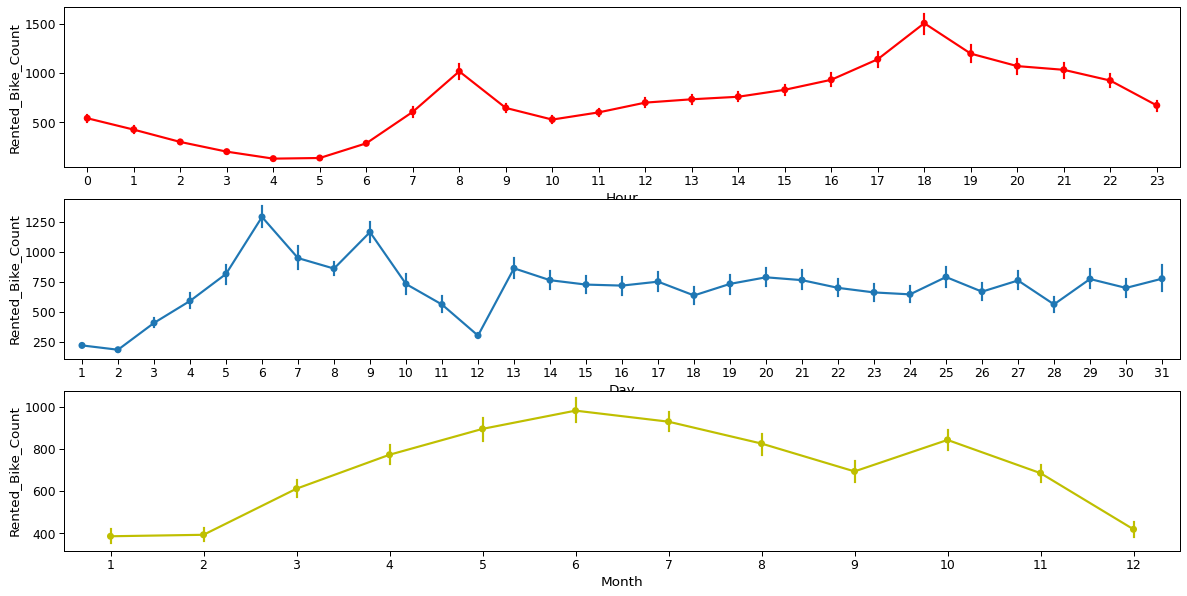

In [ ]:
plt.rc('font',size=11)

figure,axes =plt.subplots(nrows=3,figsize=(20,10))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',color='r',ax=axes[0]) 
sns.pointplot(data=df,x='Day',y='Rented_Bike_Count',ax=axes[1])
sns.pointplot(data=df,x='Month',y='Rented_Bike_Count',color='y',ax=axes[2])

### **What we observed**


 ####  *From looking the monthly, dayly and hourly graph we can say that there is rise In the Mid quarter of the year , and Again a rise in the 10th month , but People donot prefer bikes in winter*

 ####  *On hourly basis we can see that after 12 noon rental inceases till the evening 6 pm and then decreases*


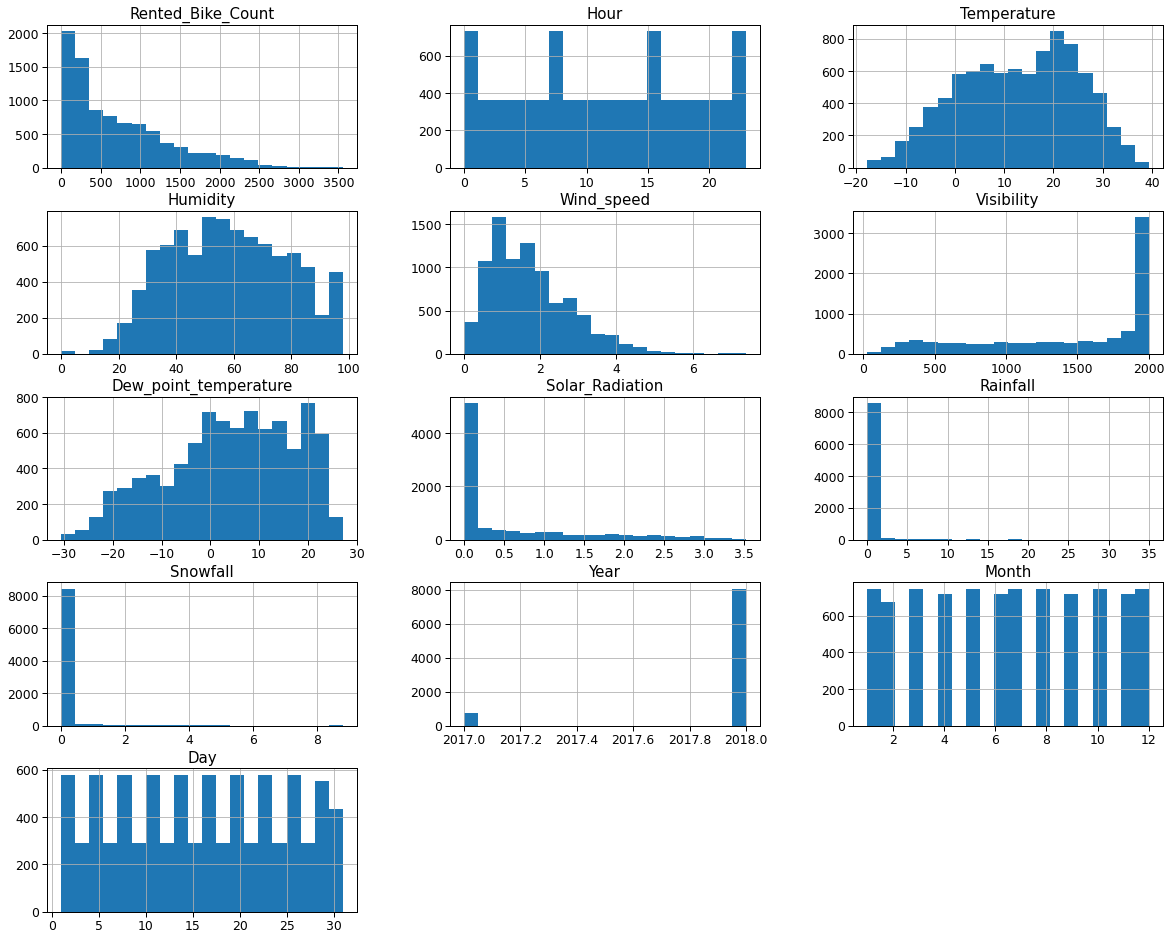

In [ ]:
df.hist(bins=20,figsize=(20,30),layout=(9,3))
plt.show()

### **Thougts on Graphs**

* Rainfall and snow fall are highly Right Skewed. 

* High rainfall and high Snow fall is less likely to occur we can see there trend with the bikes rented

# **Types of data avialable**

## Here Two types of features are present:
**1. Numeric**

**2. Categorical**

### **Analysis of Numeric Features**

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year', 'Month', 'Day'],
      dtype='object')

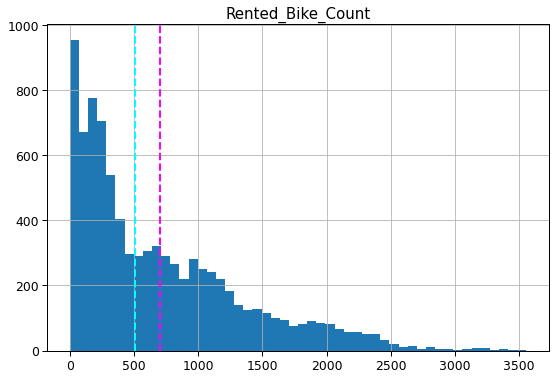

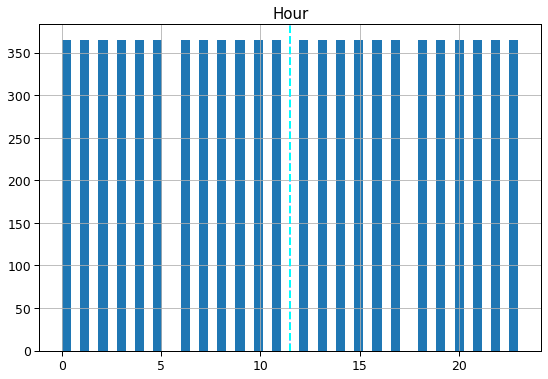

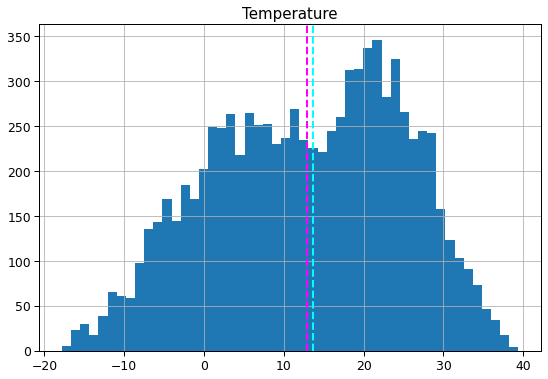

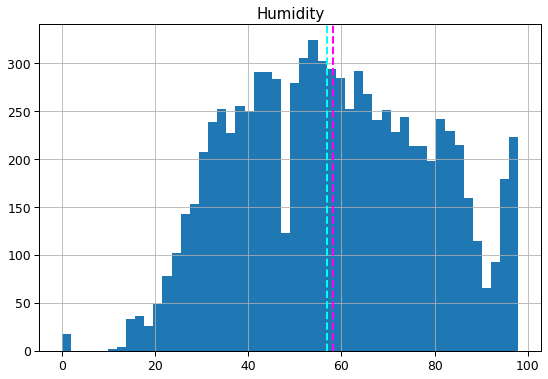

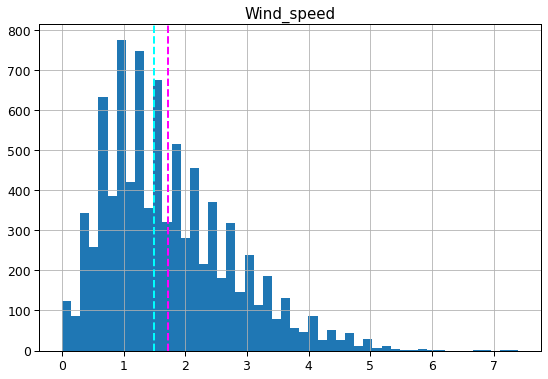

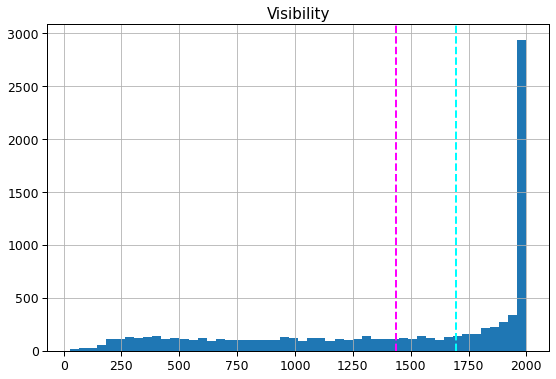

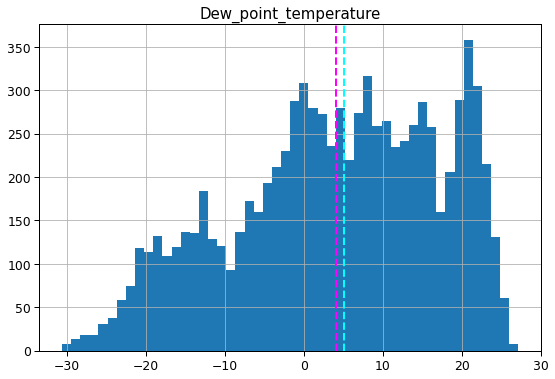

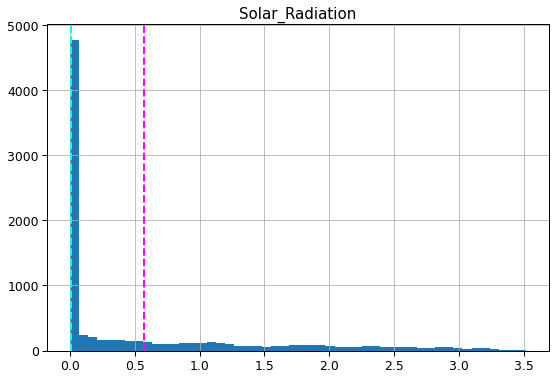

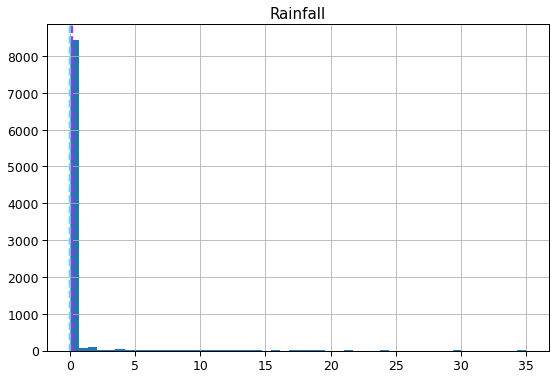

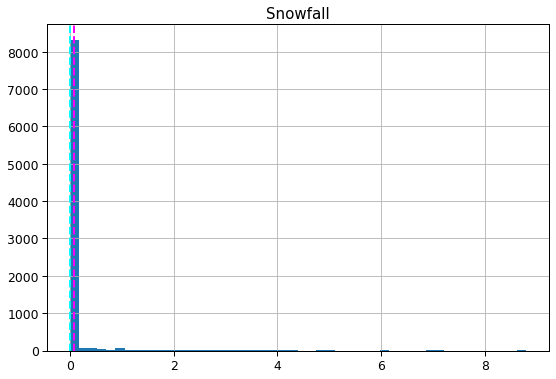

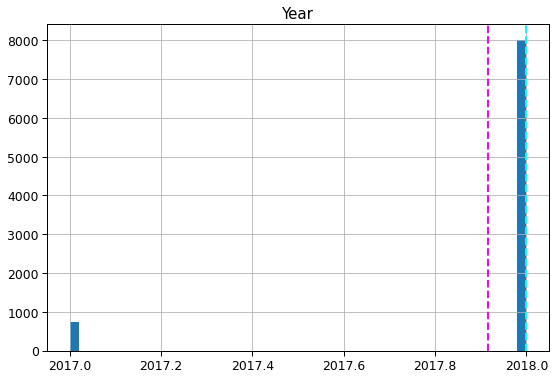

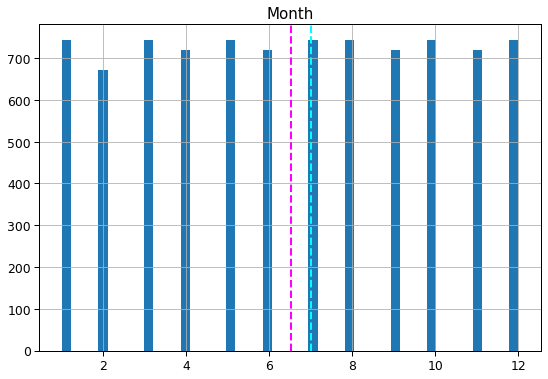

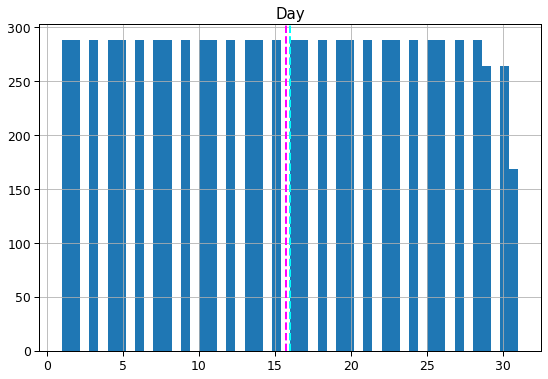

In [ ]:
# fig = plt.figure(figsize=(9,6))
# ax = fig.gca()

# feature = df['Rented_Bike_Count']
# feature.hist(bins=50, ax = ax)
# ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
# ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
# ax.set_title('Rented_Bike_Count')

# To iterate through each column in numeric feature we used for loop

for col in numeric_features:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

### **Finding the correlation**

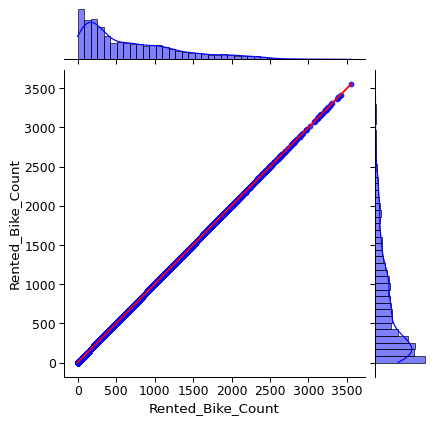

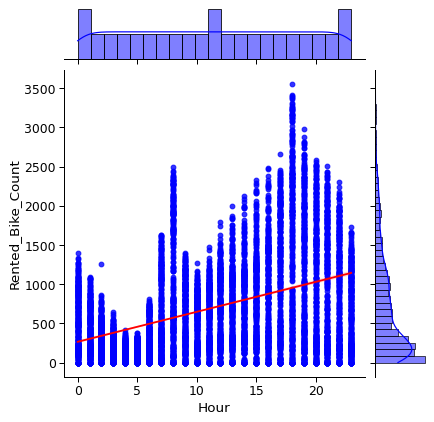

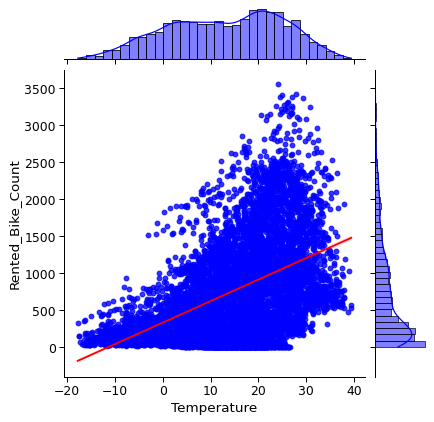

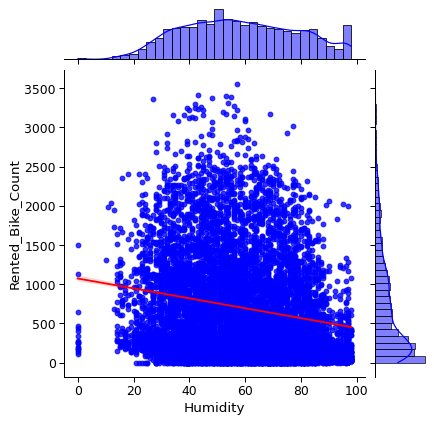

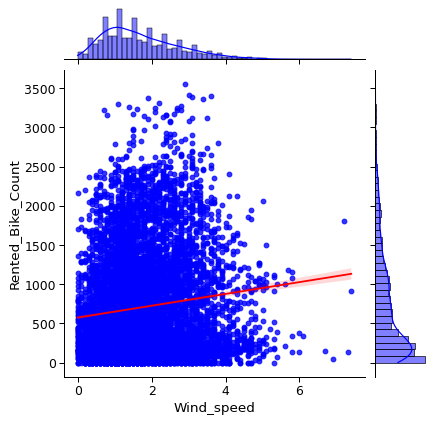

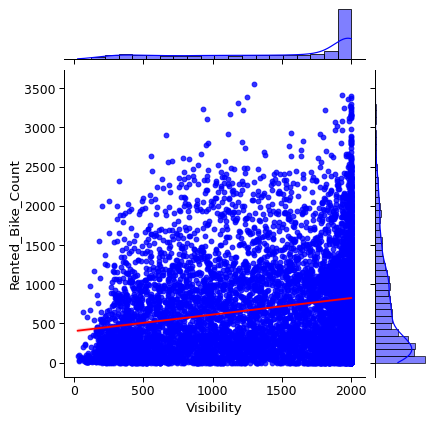

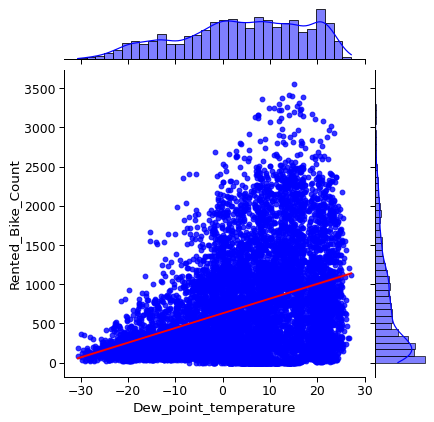

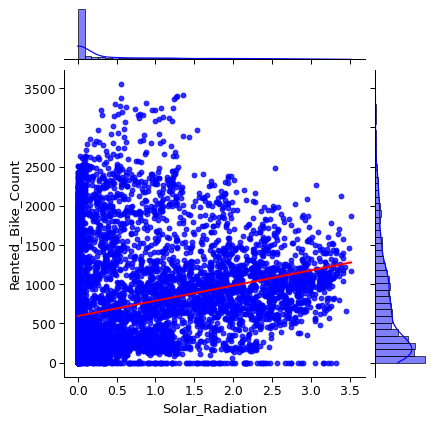

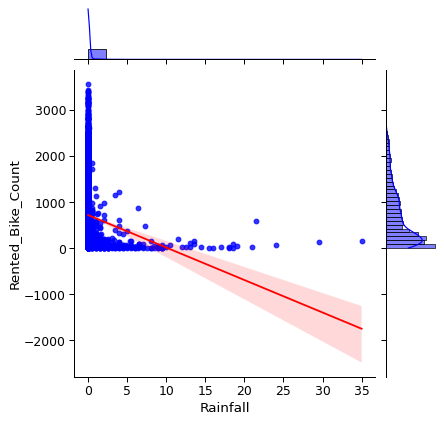

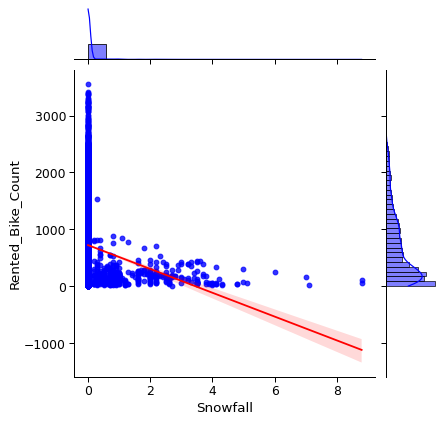

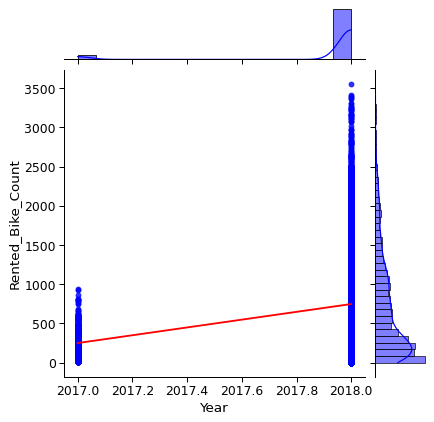

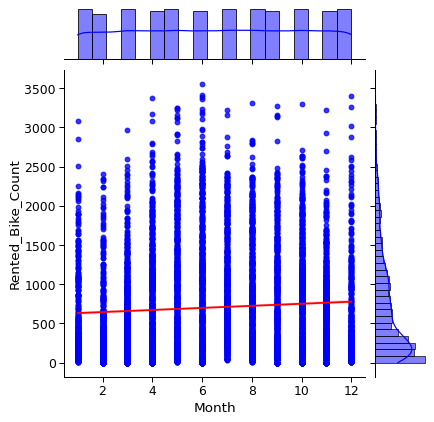

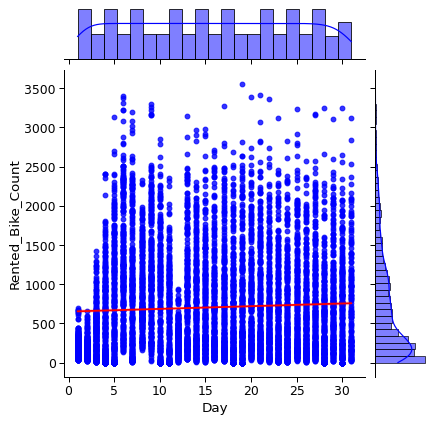

In [ ]:
'''
for col in numeric_features:
  sns.jointplot(x=col,y='Rented_Bike_Count',data=df,kind='reg',color='blue',palette='rainbow',joint_kws={'line_kws':{'color':'red'}})
'''


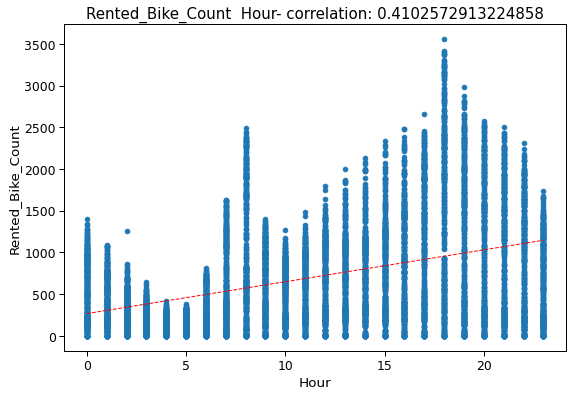

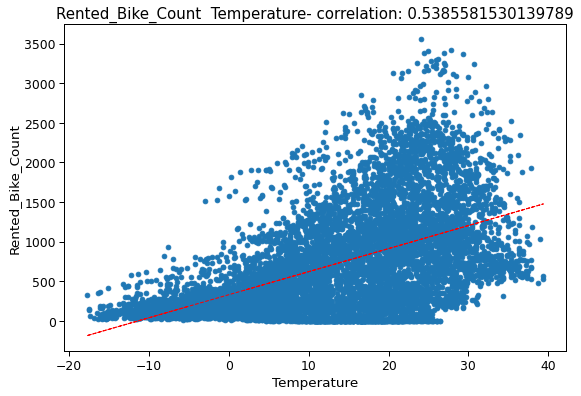

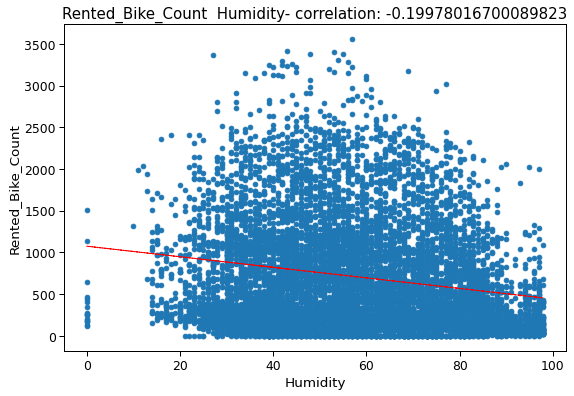

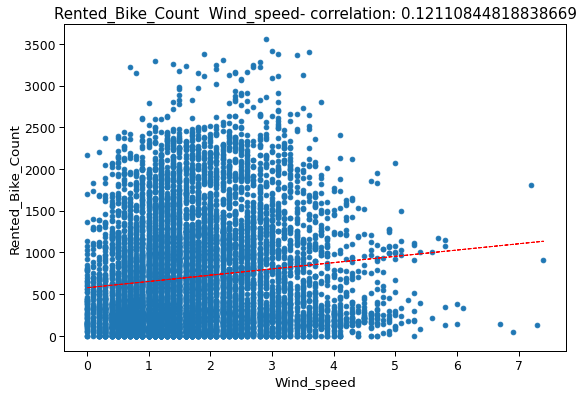

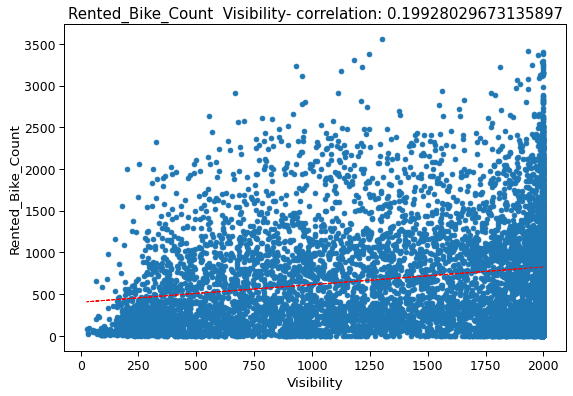

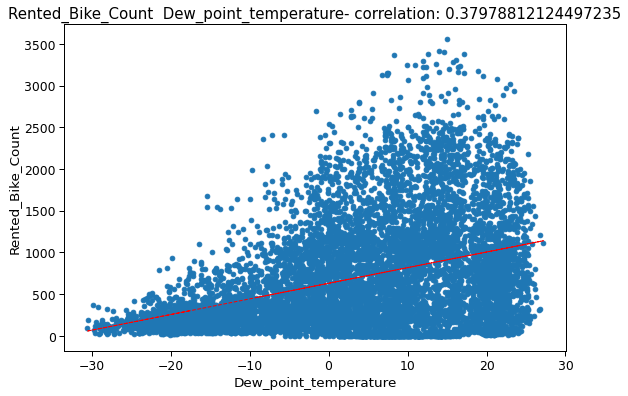

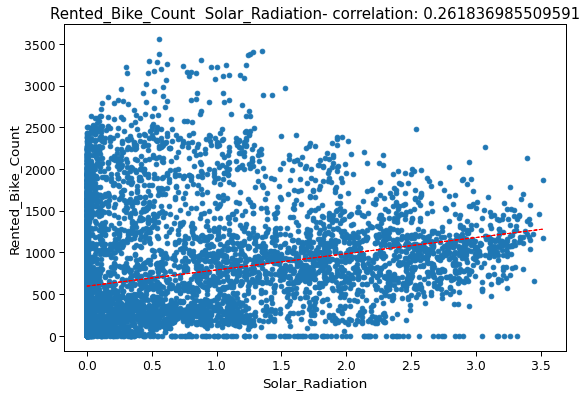

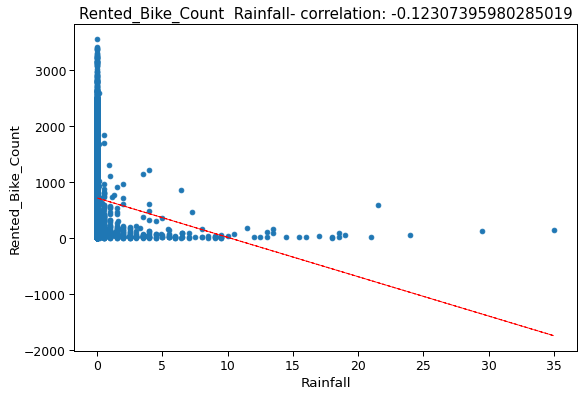

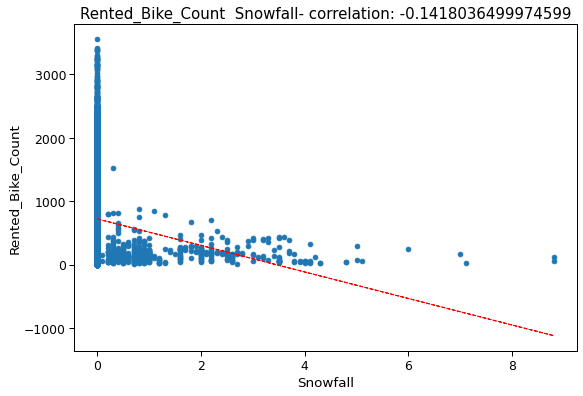

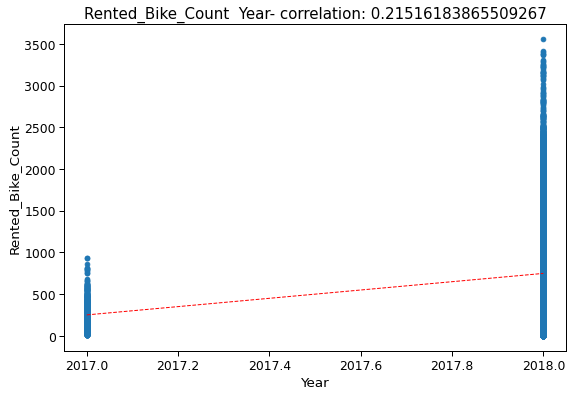

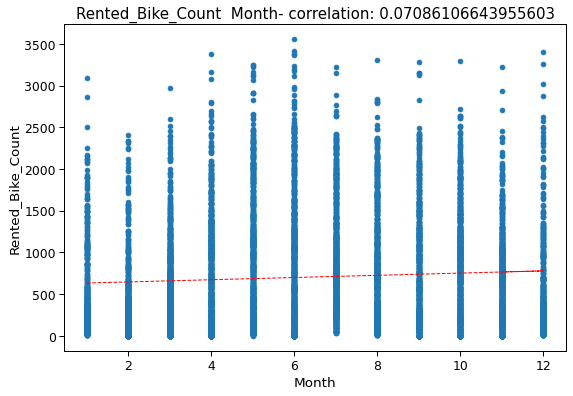

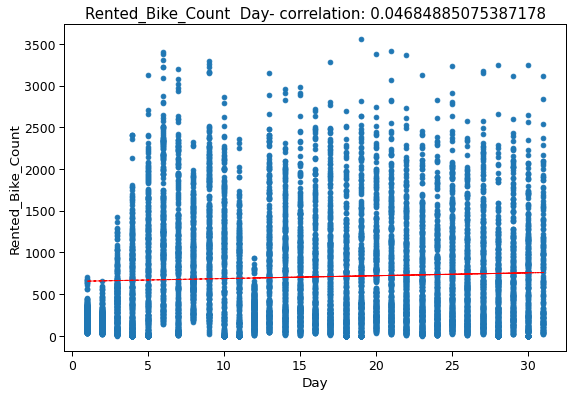

In [ ]:
for col in numeric_features[1:]:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()

   feature = df[col]
   label = df['Rented_Bike_Count']
   correlation = feature.corr(label)

   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Rented_Bike_Count')
   ax.set_title('Rented_Bike_Count  ' + col + '- correlation: ' + str(correlation))
   
   z = np.polyfit(df[col], df['Rented_Bike_Count'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
# plt.show()

**Observations from above plots**
___
1. First scatter plot showing most of the high demand during office timings around 8 A.M. and 8 P.M., and for 4 A.M. and 5 A.M. demand is very low. from all we can say timing is a important feature for predicting demand.

2. Second plot shows demand is increasing with increasing temperature.
3. Demand is decreasing with increasing humidity.
4. Wind scatter plot showing with increase in wind speed their slightly increase in demand.
5. Visiblity have approx 20% correlation with rented bike demand, so as visibilty increases demand also increases.
6. Dew point temperature has 38% correlation with demand, so as DPT increases demand increases.
7. With increasing in solar radiation bike demand increases but slightly.
8. Generally people don't prefer riding in rainfall and snowfall, so they have very high negative correaltion with bike demand.
___

### **Analysis of  Categorical Features**

In [ ]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

##  Plotting bar plot for each categorical feature for count


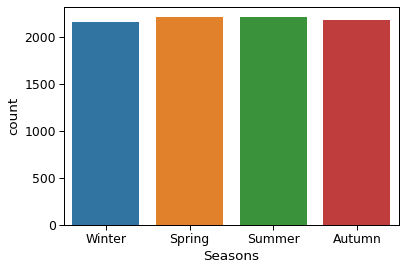

In [ ]:
# Plotting bar plot for each categorical feature for count

sns.countplot(x=df['Seasons'],data=df)

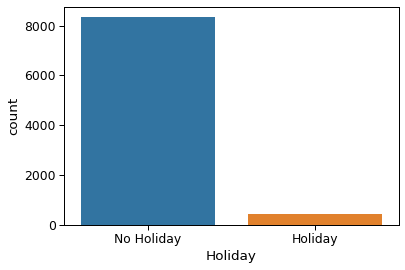

In [ ]:
sns.countplot(x=df['Holiday'],data=df)

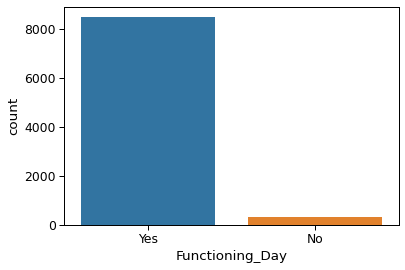

In [ ]:
sns.countplot(x=df['Functioning_Day'],data=df)

## Plotting boxplot for the label by each categorical feature  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

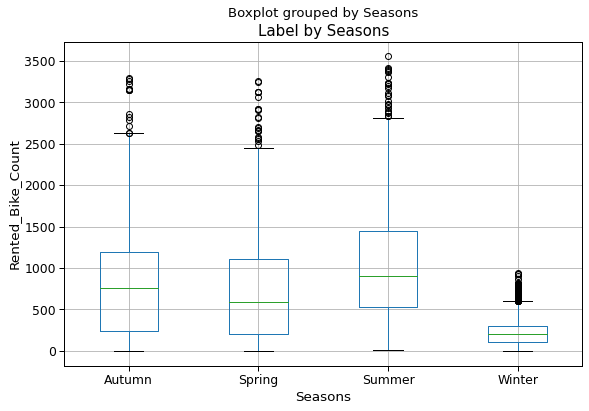

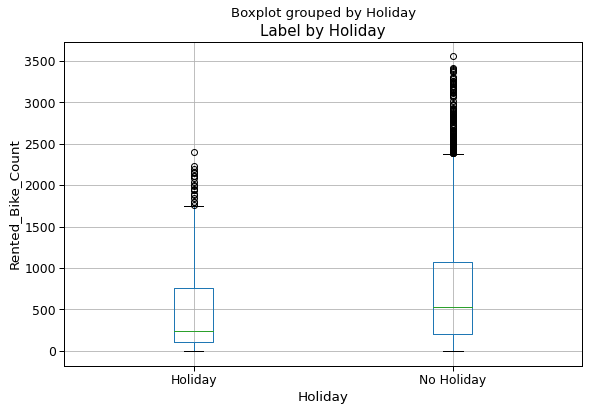

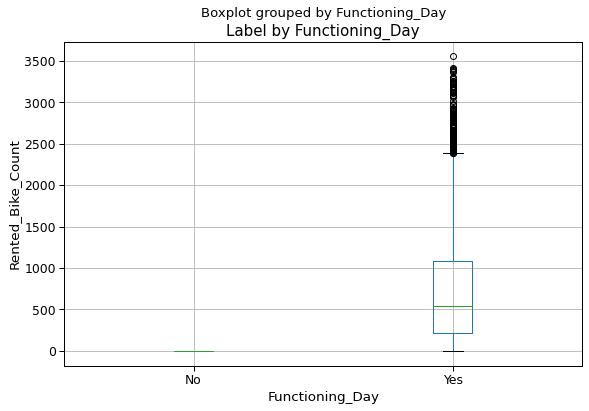

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented_Bike_Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented_Bike_Count")


In [ ]:
df.groupby('Seasons')['Rented_Bike_Count'].nunique()

Seasons
Autumn    1208
Spring    1292
Summer    1408
Winter     553
Name: Rented_Bike_Count, dtype: int64

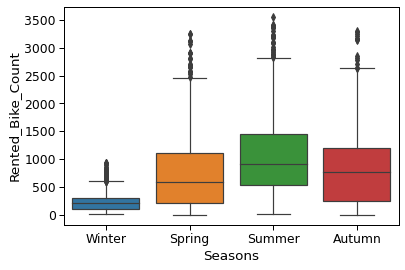

In [ ]:
sns.boxplot(x=df['Seasons'],y=df['Rented_Bike_Count'],data=df)

In [ ]:
df.groupby('Holiday')['Rented_Bike_Count'].nunique()

Holiday
Holiday        333
No Holiday    2148
Name: Rented_Bike_Count, dtype: int64

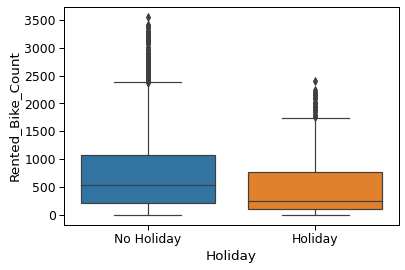

In [ ]:
sns.boxplot(x=df['Holiday'],y=df['Rented_Bike_Count'],data=df)

In [ ]:
df.groupby('Functioning_Day')['Rented_Bike_Count'].nunique()

Functioning_Day
No        1
Yes    2165
Name: Rented_Bike_Count, dtype: int64

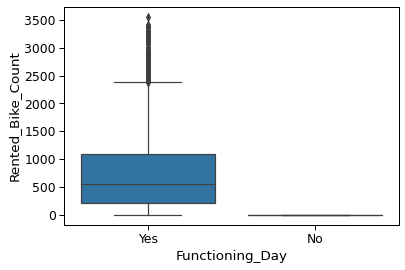

In [ ]:
sns.boxplot(x=df['Functioning_Day'],y=df['Rented_Bike_Count'],data=df)

**Observations**
___
1. Most of the bike rented during working days or on no holiday.
2. We also observe that people prefer more renting bikes in summer season followed by autumn season.
___

## Heatmap

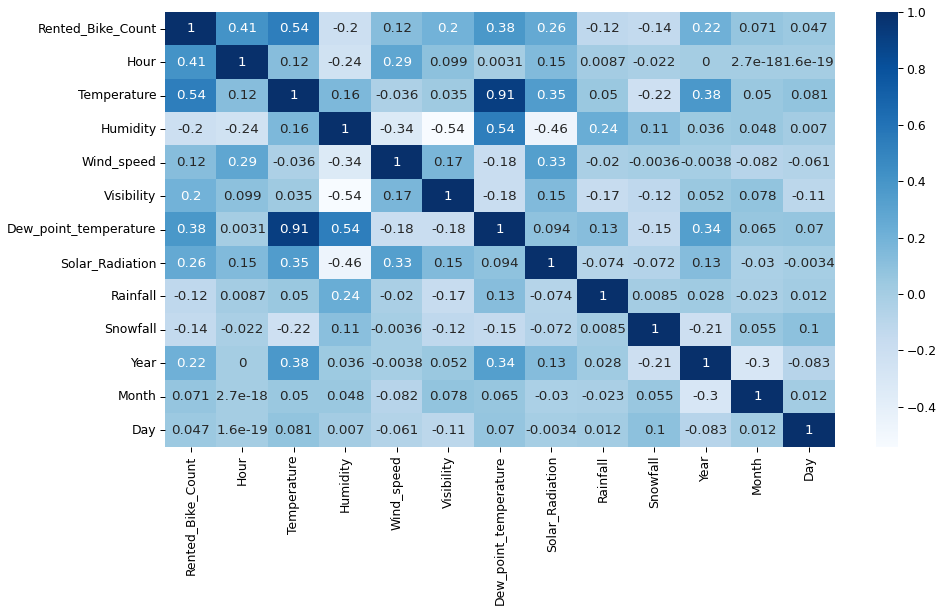

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context('paper',font_scale=1.4)

df_cor = df.corr()
sns.heatmap(df_cor,annot=True,cmap='Blues')

## **Feature Engineering**

---
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The goal of feature engineering and selection is to improve the performance of machine learning (ML) algorithms.



### Data Preaparation and transformation

In [ ]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
# We are droping Date column. We already get the day, month and year from the date column

df.drop(labels='Date',axis=1,inplace=True)
df.drop(labels='Month',axis=1,inplace=True)
df.drop(labels='Year',axis=1,inplace=True)
df.drop(labels='Day',axis=1,inplace=True)


In [ ]:
# Independent Variable

independent_var = df.drop(labels='Rented_Bike_Count',axis=1)

dependent_var = df['Rented_Bike_Count']

In [ ]:

#dependent_var

independent_var


,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Working on categorical data 

converting Season, Holiday and Functioning_Day by encoding

In [ ]:
# ordinal encoding 

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

# Get targeted column from categorical data
obj_col = ['Seasons','Holiday','Functioning_Day']
independent_var[obj_col] = OE.fit_transform(independent_var[obj_col])


In [ ]:
independent_var.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3.0,1.0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3.0,1.0,1.0


In [ ]:
X = independent_var.copy()
y = dependent_var.copy()

# **Implementing Linear Regression**

---
Time to train regression model! 

We will need to first split up our data into an train array that contains the part of dataset used for training data, and a test array used for test data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)


(7008, 12)
(1752, 12)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-105.29302715556094

In [ ]:
regressor.coef_

array([ 2.70045474e+01,  1.56831607e+01, -1.12758787e+01,  1.81203790e+01,
        2.76658661e-02,  1.46825090e+01, -7.87553028e+01, -5.56969634e+01,
        3.00474349e+01, -9.76659914e+01,  1.24068751e+02,  9.37193531e+02])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred = regressor.predict(X_test)

## **Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE) :** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE) :** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
**Root Mean Squared Error (RMSE) :**is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [ ]:
r2_score(y_test,y_pred)

0.5434525160139043

In [ ]:
#Evaluation metrices

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

Adjusted R2 :  0.5403021020933562
MSE : 191075.43475018447
RMSE : 437.1217619270224
MAE : 325.8907133235788


Text(0, 0.5, 'Predicted Rented Bike Count')

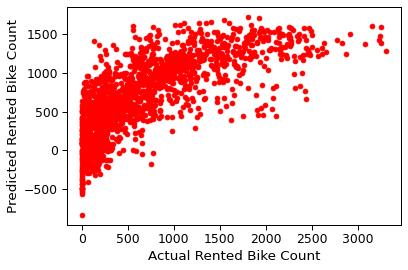

In [ ]:
# Actual vs predicated rented bike count

plt.scatter(y_test, y_pred,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')

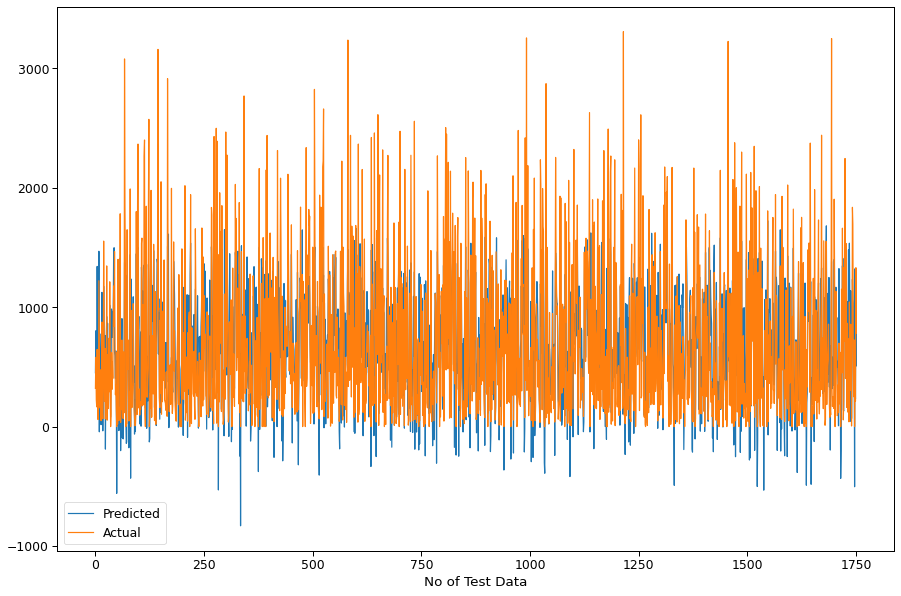

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Lasso Regression**

---
* Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

* Lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model


In [ ]:
lasso = Lasso(alpha=0.05,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.05, max_iter=3000)

In [ ]:
lasso.score(X_train,y_train)

0.5505279918146246

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_lasso)

0.5434403690036465

In [ ]:
#Evaluation metrices

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred_lasso)
print("MAE :" , MAE)

Adjusted R2 :  0.540289871262441
MSE : 191080.51854835954
RMSE : 437.12757697079644
MAE : 325.88821142615546


Text(0, 0.5, 'Lasso Predicted Rented Bike Count')

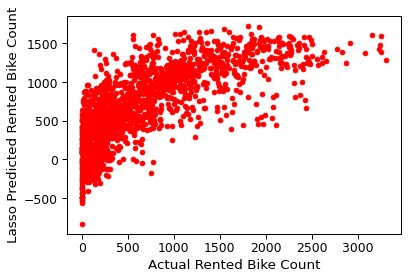

In [ ]:
# Actual vs predicated rented bike count
plt.scatter(y_test, y_pred_lasso,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Lasso Predicted Rented Bike Count')

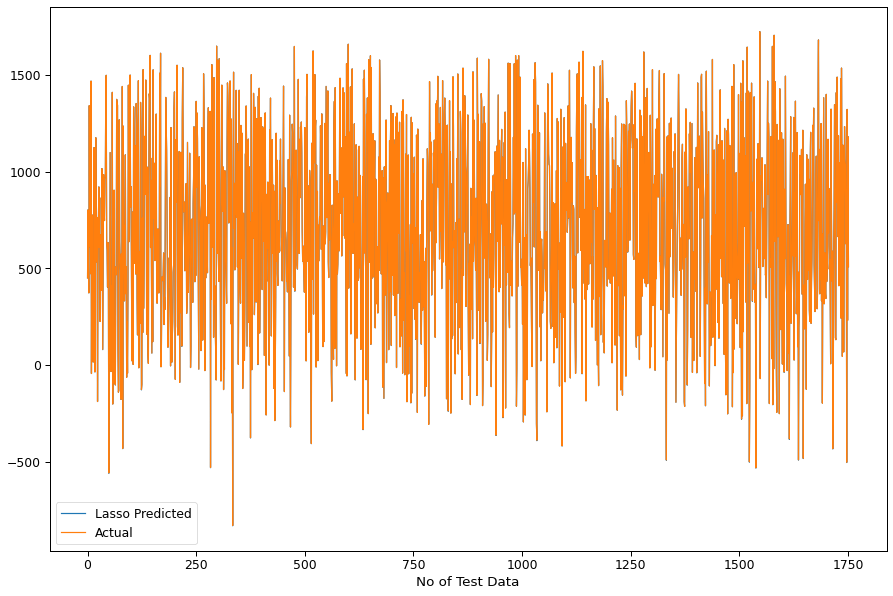

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_pred_lasso))
plt.legend(["Lasso Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### **Implementing Cross-Validation Procedure for Lasso**

---



In [ ]:
# cross-validation

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.972e+08, tolerance: 2.223e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.910e+08, tolerance: 2.174e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -187374.90428898338


In [ ]:
y_pred_lasso2 = lasso_regressor.predict(X_test)

In [ ]:
#Evaluation metrices

print("Adjusted R2 : ",1-(1-r2_score((y_pred_lasso2), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_pred_lasso2, y_pred_lasso)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_pred_lasso2, y_pred_lasso)
print("MAE :" , MAE)

Adjusted R2 :  0.9999992218676369
MSE : 0.17382406577568651
RMSE : 0.416922133947919
MAE : 0.2525638013242071


Text(0, 0.5, 'Lasso Predicted Rented Bike Count')

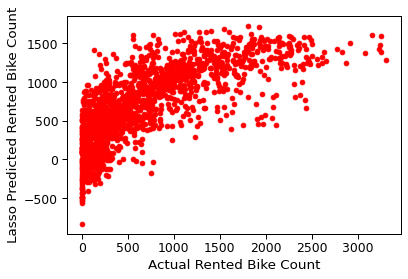

In [ ]:
# Actual vs predicated rented bike count
plt.scatter(y_test, y_pred_lasso2,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Lasso Predicted Rented Bike Count')

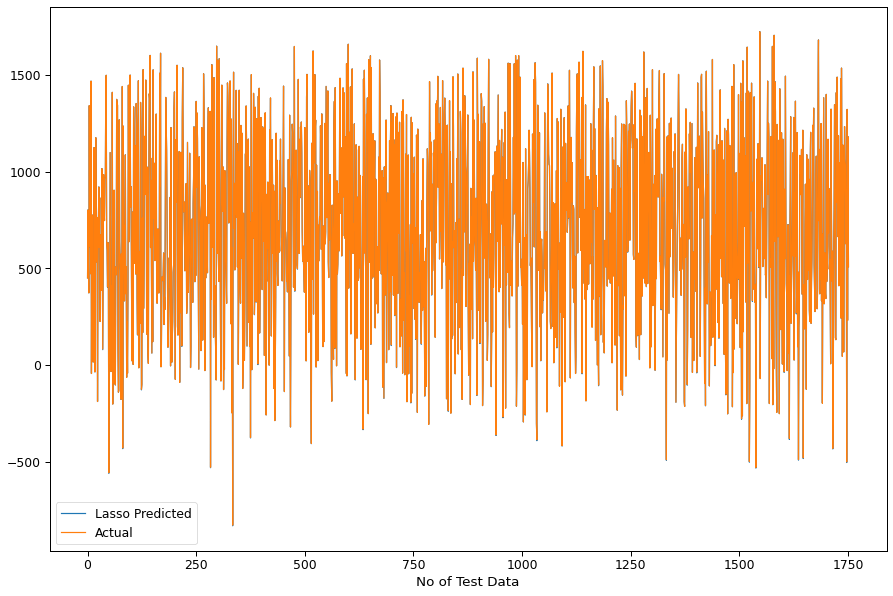

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_pred_lasso2))
plt.legend(["Lasso Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


**<br>Implementing Ridge Regression**
---
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).


In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [ ]:
y_predict_r = ridge.predict(X_test)

In [ ]:
r2_score(y_test,y_predict_r)

0.5434526547849661

In [ ]:
#Evaluation metrices

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predict_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_predict_r)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_predict_r)
print("MAE :" , MAE)

Adjusted R2 :  0.5403021135899397
MSE : 191075.4299715794
RMSE : 437.12175646103384
MAE : 325.8905789472647


Text(0, 0.5, 'Ridge Predicted Rented Bike Count')

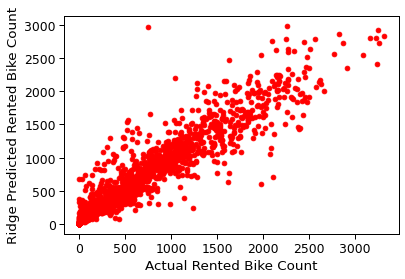

In [ ]:
# Actual vs predicated rented bike count

plt.scatter(y_test, y_predict_r,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Ridge Predicted Rented Bike Count')

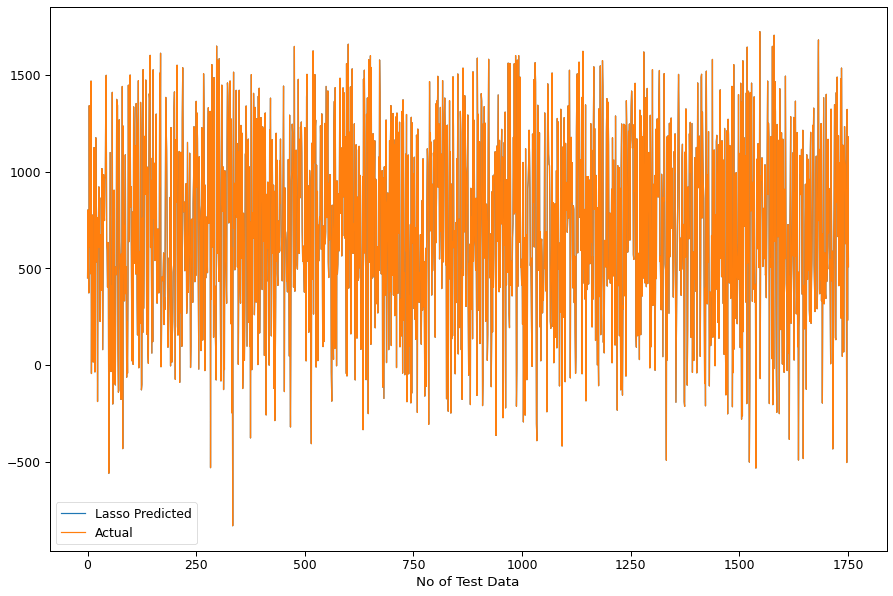

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_predict_r))
plt.legend(["Lasso Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**<br>Random Forest Regressor**
---
 

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.27983471, 0.32712183, 0.08198384, 0.01766753, 0.01951572,
       0.03530254, 0.08862808, 0.03839491, 0.00086951, 0.02957677,
       0.00270407, 0.07840049])

In [ ]:
y_predict_r = rf.predict(X_test)

In [ ]:
r2_score(y_test,y_predict_r)

0.8703521954187061

In [ ]:
#Evaluation metrices

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predict_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_predict_r)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_predict_r)
print("MAE :" , MAE)

Adjusted R2 :  0.869457558469324
MSE : 54260.534760787676
RMSE : 232.9389077865432
MAE : 141.4102682648402


Text(0, 0.5, 'Random Forest Reg Predicted Rented Bike Count')

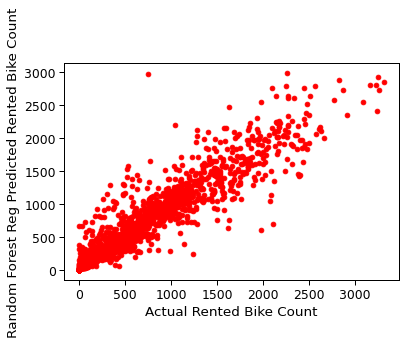

In [ ]:
# Actual vs predicated rented bike count

plt.scatter(y_test, y_predict_r,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Random Forest Reg Predicted Rented Bike Count')

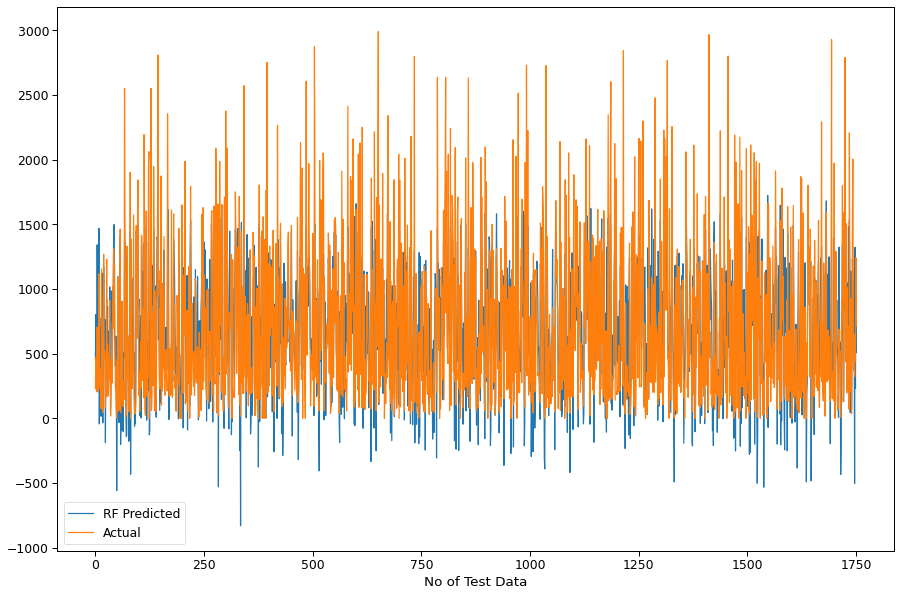

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_predict_r))
plt.legend(["RF Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#**Gradient Boosting Algorithm**

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_predict_r = gb.predict(X_test)

In [ ]:
r2_score(y_test,y_predict_r)

0.8377223117015169

In [ ]:
#Evaluation metrices

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predict_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_predict_r)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_predict_r)
print("MAE :" , MAE)

Adjusted R2 :  0.8366025116672547
MSE : 67916.8781550703
RMSE : 260.608668610755
MAE : 173.53498315928906


### **XgBoost**

In [ ]:
import xgboost as xgb
dreg= xgb.XGBRegressor(booster= 'gbtree',colsample_bylevel= 1, colsample_bynode= 1,colsample_bytree= 0.7,eta= 0.004,
                        gamma= 0,importance_type= 'gain',learning_rate= 0.1,max_delta_step= 0, max_depth= 9,min_child_weight= 10,
                        n_estimators= 100,n_jobs= 1,objective= 'reg:linear',random_state= 0,reg_alpha= 0,reg_lambda= 1,
                        scale_pos_weight= 1,subsample= 1,verbosity= 1)
dreg.fit(X_train, y_train)

[06:17:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, eta=0.004, max_depth=9, min_child_weight=10)

In [ ]:
y_pred_xg = dreg.predict(X_test)

In [ ]:
#Find R-squared value

r2 = r2_score(y_test, y_pred_xg)
r2

0.8786170470356018

In [ ]:
# Find Adjusted R-squared value

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_pred_xg)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred_xg)
print("MAE :" , MAE)

Adjusted R2 :  0.8777794418397578
MSE : 50801.507668893275
RMSE : 225.3918979663938
MAE : 140.27660047245897


In [ ]:
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.9667818524305548
Test score: 0.8786170470356018


**<br>Grid Search CV on XGboost algorithm**
---

In [ ]:
warnings.filterwarnings('ignore')

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[06:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:25] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,y_test)

0.9520762741518607

##For Test dataset:

In [ ]:
# For Test dataset:
#Find R-squared value

r2 = r2_score(y_test, test_preds)

# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9520762741518607

In [ ]:
adj_r2

0.9517455756411202

# **Conclusion**

##Hour:
There must be high demand during the office timings around 8 A.M. and 8 P.M., also for early morning and late evening we are having a relatably different trends. And, definately low demand between 8 A.M. and 8 P.M.

##Temperature:
In general, temperature has negative correlation with the bike demands. So, as the temperature increases, the bike count also increases.

##Humidity:
Humidity acts as a deterrent to a bike ride. The bike count decreases when the humidity increases.

##Wind Speed:
Due to Wind speed , there is certain increase in the bike count but the change is very small.

##Visibility:
If there is low visibility, people won't prefer to ride the bike. So,as the visibility increases , the number of bike count also increases.

##Rainfall and Snowfall:
If there is rainfall/Snowfall, people don't prefer to travel out. And, hence the bike count decreases.

##Holiday:
Most of the bike rented during working days or on no holiday.

## Seasons:
We also observe that people prefer more renting bikes in summer season followed by autumn season.

## Regression Model:
The XGBoost model have highest score i.e. 95% among.
